<a href="https://colab.research.google.com/github/Mburia/2nd-Place-Solution-UmojaHack_2021-Sendy/blob/main/UmojaHack_2021_Sendy_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zindi UmojaHack Africa 2021 #2: Sendy - Delivery Rider Response Challenge (INTERMEDIATE) by UmojaHack Africa

This notebook was created in Google Colab

In [ ]:
# Importing Libraries
import requests
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Set user authentification path
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# logging to avoid discovery_cache error
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

# Getting Id of data file and load data in Google Colab
# https://drive.google.com/drive/folders/16RYdhdDcj_glWKjXR7OnT4bfcSXUymYw?usp=sharing
file_list = drive.ListFile({'q': "'16RYdhdDcj_glWKjXR7OnT4bfcSXUymYw' in parents and trashed=false"}).GetList()

# View files in the Drive Folder
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Train.csv, id: 1V_4PpDw_HyxlJldsLVp_jD4MKJL3Z3TF
title: Test.csv, id: 1IvFdJrFh5D7BCLdxIgkdc3TWDjmTMaOQ
title: SampleSubmission.csv, id: 1dgWW9OIcgTh2jQgw50IBmqdsKLIAj0Yn
title: Sendy_UmojaHack_StarterNotebook.ipynb, id: 1l-0j56vYE-n8dKQ_kBGTBOkI2NmUpbcq
title: Riders.csv, id: 1i8rR25xDMe73IxqGdj4CKL64yWxj4ypP


In [ ]:
# Loading the Data from the source i.e. csv
import os
from io import StringIO

# Now, we will be getting content of file by using id.
# Train file
train_file =  drive.CreateFile({'id': '1V_4PpDw_HyxlJldsLVp_jD4MKJL3Z3TF'})
train_file.GetContentFile('Train.csv')
# Test file
test_file =  drive.CreateFile({'id': '1IvFdJrFh5D7BCLdxIgkdc3TWDjmTMaOQ'})
test_file.GetContentFile('Test.csv')
# Rider file
rider_file =  drive.CreateFile({'id': '1i8rR25xDMe73IxqGdj4CKL64yWxj4ypP'})
rider_file.GetContentFile('Riders.csv')
# Data URL's
train_url = 'https://drive.google.com/file/d/1V_4PpDw_HyxlJldsLVp_jD4MKJL3Z3TF/view?usp=sharing'
test_url = 'https://drive.google.com/file/d/1IvFdJrFh5D7BCLdxIgkdc3TWDjmTMaOQ/view?usp=sharing'
rider_url = 'https://drive.google.com/file/d/1i8rR25xDMe73IxqGdj4CKL64yWxj4ypP/view?usp=sharing'

# Function to read CSV file
def read_csv(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  csv_raw = requests.get(url).text
  csv = StringIO(csv_raw)
  return csv

# Load the data
import pandas as pd
df_train = pd.read_csv(read_csv(train_url))
df_test = pd.read_csv(read_csv(test_url))
df_riders = pd.read_csv(read_csv(rider_url))

In [ ]:
# Creating Copy to work with
train = df_train.copy()
test = df_test.copy()
riders = df_riders.copy()

In [ ]:
# Determining the no. of records in our datasets
print('The train dataset has ', train.shape[1], ' columns and ', train.shape[0], ' rows!')
print('The test dataset has ', test.shape[1], ' columns and ', test.shape[0], ' rows!')
print('The test dataset has ', riders.shape[1], ' columns and ', riders.shape[0], ' rows!')

The train dataset has  21  columns and  179867  rows!
The test dataset has  20  columns and  76791  rows!
The test dataset has  4  columns and  2632  rows!


In [ ]:
# Separate target variable 
target = train['target']

In [ ]:
# Drop target column then join Train and test
train.drop('target',axis = 1, inplace = True)

# Merge the train and test dataframe
frames = [train,test]
df = pd.concat(frames)

In [ ]:
# Checking unique values and number of rows asigned for each column in the dataset
for i in df.columns:
  
  print('\n')
  
  print(i,df[i].nunique())

  print(i,df[i].unique())



ID 256658
ID ['ID_SCUW21PVAU' 'ID_2HA7X30JMN' 'ID_IAJWDTBY6M' ... 'ID_VDI8L0SWNS'
 'ID_7L22AF1T6K' 'ID_LMMA33Q7YL']


order_id 64326
order_id [ 4435 32711  8712 ... 11467 12867 12617]


dispatch_day 31
dispatch_day [27 30 14 22  3 18 28 20  6 12 17  7  5  1 15 31 16  4 25 19 11 23 21  9
 13 10 26  2  8 29 24]


dispatch_day_of_week 7
dispatch_day_of_week [6 7 2 3 5 4 1]


dispatch_time 5788
dispatch_time ['09:02:54' '13:01:37' '10:01:00' ... '06:09:58' '20:08:49' '05:09:47']


client_id 5457
client_id [ 593630  837729  695129 ...  676936 2533910 2361571]


client_type 2
client_type ['Business' 'Personal']


order_license_status 2
order_license_status [0 1]


order_carrier_type 3
order_carrier_type [2 1 0]


vendor_type 1
vendor_type ['Bike']


rider_id 775
rider_id [ 30153  20884  33143  96531 103546  66125  66033  45701 117622  40066
  74842  93610   9729 117093  80132  93633 117760 115184  62445 118082
  76406   5865 118588 100441   7383 105892  66010 106398 100855  64561
  53521  

## Feature Engineering

##### Rider Amount Class

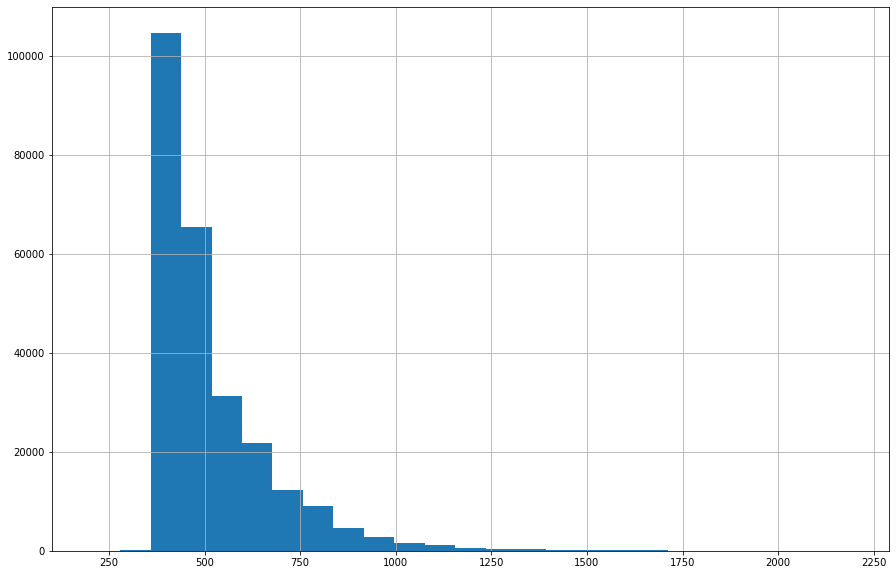

In [ ]:
# Let's view the distribution of the rider's payment for the dispatch
hist_amount = df.rider_amount.hist(bins=25,figsize=[15,10])

In [ ]:
import numpy as np
# create a list of our conditions
conditions = [
    (df['rider_amount'] <= 390),
    (df['rider_amount'] > 390) & (df['rider_amount'] <= 650),
    (df['rider_amount'] > 650) & (df['rider_amount'] <= 820),
    (df['rider_amount'] > 800) & (df['rider_amount'] <= 1200)
    ]

# create a list of the values we want to assign for each condition
values = ['2', '4', '3', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
df['rider_amount_range'] = np.select(conditions, values)

# display updated DataFrame
df.head(3)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,4


Day of month

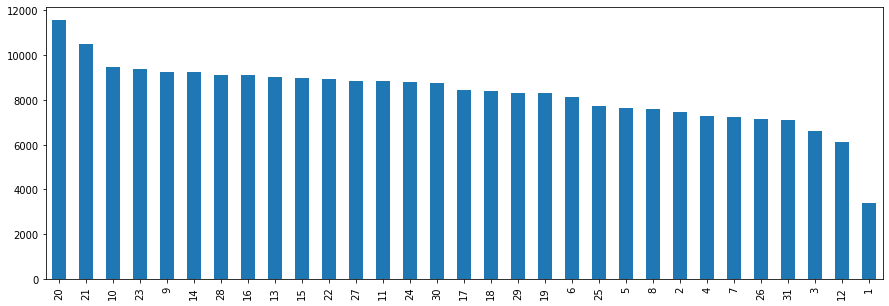

In [ ]:
# Dispatches frequency per day of month
df['dispatch_day'].value_counts().plot(kind='bar',figsize=[15,5])

In [ ]:
# create a list of our conditions
conditions = [
    (df['dispatch_day'] == 1),
    (df['dispatch_day'] > 1) & (df['dispatch_day'] <= 6),
    (df['dispatch_day'] > 6) & (df['dispatch_day'] <= 8),
    (df['dispatch_day'] >8)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2','3','4']

# create a new column and use np.select to assign values to it using our lists as arguments
df['dispatch_day_range'] = np.select(conditions, values)

# display updated DataFrame
df.head(3)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,4,4


Weekends

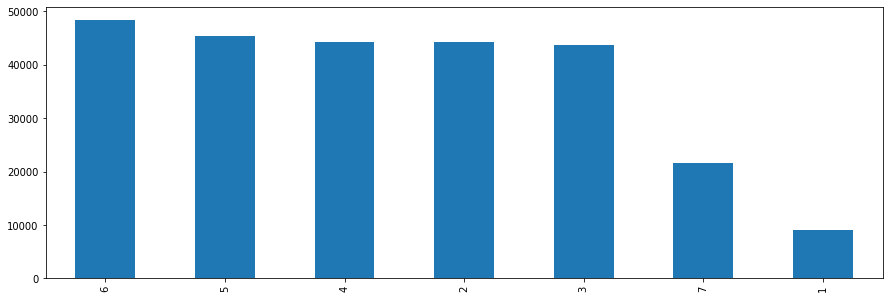

In [ ]:
# Dispatches frequency per  weekday
df['dispatch_day_of_week'].value_counts().plot(kind='bar',figsize=[15,5])

In [ ]:
# create a list of our conditions
conditions = [
    (df['dispatch_day_of_week'] == 1),
    (df['dispatch_day_of_week'] == 7)
    ]

# create a list of the values we want to assign for each condition
values = ['2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
df['weekend'] = np.select(conditions, values)

# display updated DataFrame
df.head(3)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range,weekend
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4,0
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4,1
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,4,4,0


Busy Hours

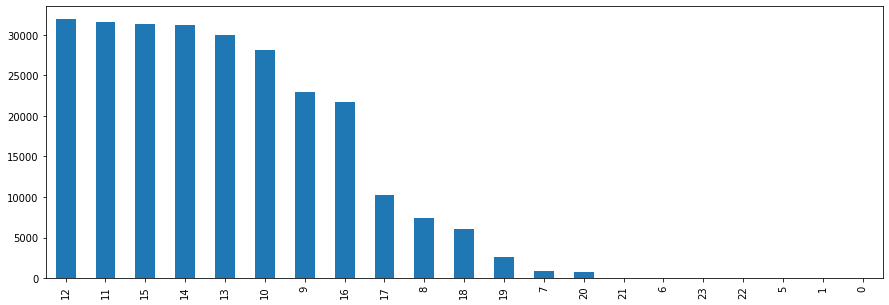

In [ ]:
# Convert time column to datetime
df['dispatch_time'] = pd.to_datetime(df['dispatch_time'])

# Extract Hour Column
df['dispatch_hour'] = df['dispatch_time'].dt.hour

# Let's view the hourly distribution of dispatches
df['dispatch_hour'].value_counts().plot(kind='bar',figsize=[15,5])

In [ ]:
# Let's get the cos and cosine of our Time Variable
time_column = ["dispatch_time"]

for col in time_column:
  df[col.split('_')[0] + '_hour_sine'] = np.sin(2 * np.pi * df[col].dt.hour/24)
  df[col.split('_')[0] + '_hour_cos'] = np.cos(2* np.pi * df[col].dt.hour/24)

In [ ]:
# create a list of our conditions
conditions = [
    (df['dispatch_hour'] <= 6),
    (df['dispatch_hour'] > 8) & (df['dispatch_hour'] <= 16),
    (df['dispatch_hour'] > 16) & (df['dispatch_hour'] <= 20),
    (df['dispatch_hour'] > 20)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '4', '3', '2']

# create a new column and use np.select to assign values to it using our lists as arguments
df['busy_hours'] = np.select(conditions, values)

# display updated DataFrame
df.head(2)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range,weekend,dispatch_hour,dispatch_hour_sine,dispatch_hour_cos,busy_hours
0,ID_SCUW21PVAU,4435,27,6,2021-03-28 09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4,0,9,0.707107,-0.707107,4
1,ID_2HA7X30JMN,32711,30,7,2021-03-28 13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4,1,13,-0.258819,-0.965926,4


Geo Distance

In [ ]:
# Calculate distance between coordinates

def distance_calc(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    
    AVG_EARTH_RADIUS = 6371  # in km
    
    lat = lat2 - lat1
    
    lng = lng2 - lng1
    
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    
    return h

In [ ]:
import numpy as np

# Let's create variables for the distances between the locations of the riders, pickup points and dropoff points
df['rider_dropoff_dist'] = distance_calc(df.rider_lat, df.rider_long, df.drop_off_lat, df.drop_off_long)
df['rider_pickup_dist'] = distance_calc(df.rider_lat, df.rider_long, df.pickup_lat, df.pickup_long)
df['pickup_dropoff_dist'] = distance_calc(df.pickup_lat, df.pickup_long, df.drop_off_lat, df.drop_off_long)


### Distance Ranges

Pickup Drop_off ranges

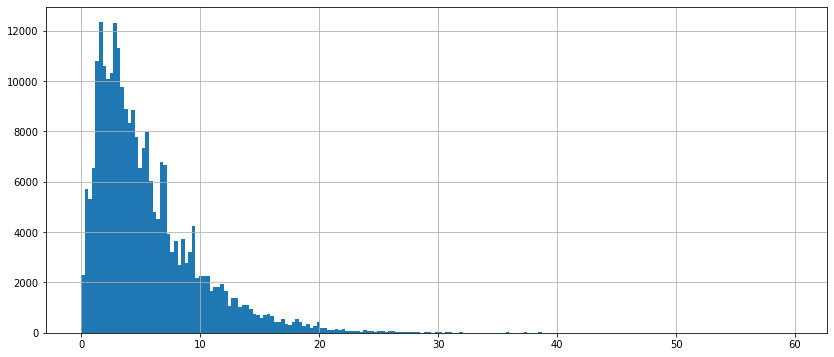

In [ ]:
# We can now view the distribution of the distance between pickup and drop off locations

bin_values = np.arange(start=-0, stop=60, step=0.3)
df['pickup_dropoff_dist'].hist(bins=bin_values, figsize=[14,6])

In [ ]:
# create a list of our conditions
conditions = [
    (df['pickup_dropoff_dist'] <= 6),
    (df['pickup_dropoff_dist'] > 6) & (df['pickup_dropoff_dist'] <= 16),
    (df['pickup_dropoff_dist'] > 16) & (df['pickup_dropoff_dist'] <= 30),
    (df['pickup_dropoff_dist'] > 30) & (df['pickup_dropoff_dist'] <= 50),
    (df['pickup_dropoff_dist'] > 50)
    ]

# create a list of the values we want to assign for each condition
values = ['5','4', '3', '2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
df['pickup_dropoff_dist_range'] = np.select(conditions, values)

# display updated DataFrame
df.head(2)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range,weekend,dispatch_hour,dispatch_hour_sine,dispatch_hour_cos,busy_hours,rider_dropoff_dist,rider_pickup_dist,pickup_dropoff_dist,pickup_dropoff_dist_range
0,ID_SCUW21PVAU,4435,27,6,2021-03-28 09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4,0,9,0.707107,-0.707107,4,16.076117,1.746491,14.426076,4
1,ID_2HA7X30JMN,32711,30,7,2021-03-28 13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4,1,13,-0.258819,-0.965926,4,13.417651,0.394373,13.126454,4


Rider_Pickup_Ranges

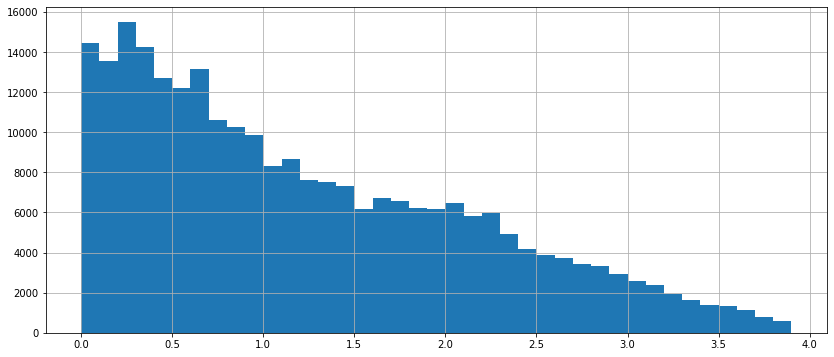

In [ ]:
# Let's also look at distribution of the distance between the rider and the pickup location

bin_values = np.arange(start=-0, stop=4, step=0.1)
df['rider_pickup_dist'].hist(bins=bin_values, figsize=[14,6])

In [ ]:
# create a list of our conditions
conditions = [
    (df['rider_pickup_dist'] <= 1),
    (df['rider_pickup_dist'] > 1) & (df['rider_pickup_dist'] <= 1.5),
    (df['rider_pickup_dist'] > 1.5) & (df['rider_pickup_dist'] <= 2.5),
    (df['rider_pickup_dist'] > 2.5) & (df['rider_pickup_dist'] <= 3.7),
    (df['rider_pickup_dist'] > 3.7)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4','5']

# create a new column and use np.select to assign values to it using our lists as arguments
df['rider_pickup_dist_range'] = np.select(conditions, values)

# display updated DataFrame
df.head(3)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range,weekend,dispatch_hour,dispatch_hour_sine,dispatch_hour_cos,busy_hours,rider_dropoff_dist,rider_pickup_dist,pickup_dropoff_dist,pickup_dropoff_dist_range,rider_pickup_dist_range
0,ID_SCUW21PVAU,4435,27,6,2021-03-28 09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4,0,9,0.707107,-0.707107,4,16.076117,1.746491,14.426076,4,3
1,ID_2HA7X30JMN,32711,30,7,2021-03-28 13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4,1,13,-0.258819,-0.965926,4,13.417651,0.394373,13.126454,4,1
2,ID_IAJWDTBY6M,8712,14,2,2021-03-28 10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,4,4,0,10,0.500000,-0.866025,4,7.224872,1.846564,5.421337,5,3


Rider Drop_off_Ranges

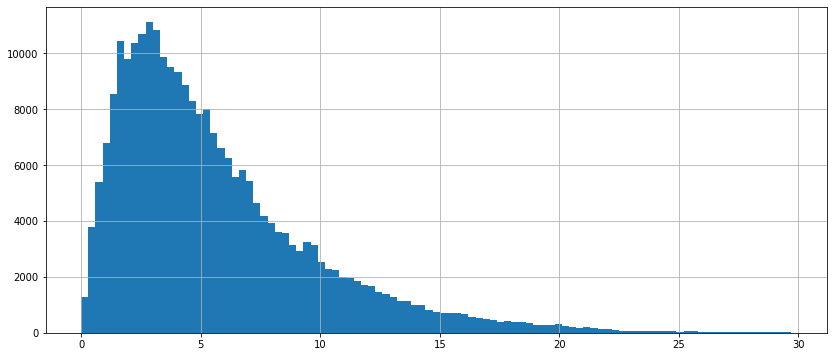

In [ ]:
# Let's also visualize the distance between the rider and drop off location

bin_values = np.arange(start=-0, stop=30, step=0.3)
df['rider_dropoff_dist'].hist(bins=bin_values, figsize=[14,6])

In [ ]:
# create a list of our conditions
conditions = [
    (df['rider_dropoff_dist'] <= 5),
    (df['rider_dropoff_dist'] > 5) & (df['rider_dropoff_dist'] <= 10),
    (df['rider_dropoff_dist'] > 10) & (df['rider_dropoff_dist'] <= 18),
    (df['rider_dropoff_dist'] > 18) & (df['rider_dropoff_dist'] <= 30),
    (df['rider_dropoff_dist'] > 30)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4','5']

# create a new column and use np.select to assign values to it using our lists as arguments
df['rider_dropoff_dist_range'] = np.select(conditions, values)

# display updated DataFrame
df.head(3)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range,weekend,dispatch_hour,dispatch_hour_sine,dispatch_hour_cos,busy_hours,rider_dropoff_dist,rider_pickup_dist,pickup_dropoff_dist,pickup_dropoff_dist_range,rider_pickup_dist_range,rider_dropoff_dist_range
0,ID_SCUW21PVAU,4435,27,6,2021-03-28 09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4,0,9,0.707107,-0.707107,4,16.076117,1.746491,14.426076,4,3,3
1,ID_2HA7X30JMN,32711,30,7,2021-03-28 13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4,1,13,-0.258819,-0.965926,4,13.417651,0.394373,13.126454,4,1,3
2,ID_IAJWDTBY6M,8712,14,2,2021-03-28 10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,4,4,0,10,0.500000,-0.866025,4,7.224872,1.846564,5.421337,5,3,2


Time and Distance

In [ ]:
# create a list of our conditions
conditions = [
    (df['rider_dropoff_dist_range'] == '5') & (df['busy_hours'] == '1'),
    (df['rider_dropoff_dist_range'] == '4') & (df['busy_hours'] == '2'),
    (df['rider_dropoff_dist_range'] == '3') & (df['busy_hours'] == '3'),
    (df['rider_dropoff_dist_range'] == '2') & (df['busy_hours'] == '4'),
    (df['rider_dropoff_dist_range'] == '1') & (df['busy_hours'] == '4'),
    (df['rider_dropoff_dist_range'] == '2') & (df['busy_hours'] == '0')
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4','6','5']

# create a new column and use np.select to assign values to it using our lists as arguments
df['time_distance_bias'] = np.select(conditions, values)

# display updated DataFrame
df.head(2)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range,weekend,dispatch_hour,dispatch_hour_sine,dispatch_hour_cos,busy_hours,rider_dropoff_dist,rider_pickup_dist,pickup_dropoff_dist,pickup_dropoff_dist_range,rider_pickup_dist_range,rider_dropoff_dist_range,time_distance_bias
0,ID_SCUW21PVAU,4435,27,6,2021-03-28 09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4,0,9,0.707107,-0.707107,4,16.076117,1.746491,14.426076,4,3,3,0
1,ID_2HA7X30JMN,32711,30,7,2021-03-28 13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4,1,13,-0.258819,-0.965926,4,13.417651,0.394373,13.126454,4,1,3,0


Weekday vs Time_distance

In [ ]:
# create a list of our conditions
conditions = [
    (df['dispatch_day_of_week'] == '1') & (df['time_distance_bias'] == '5'), # Sunday  early morning & average distance
    (df['dispatch_day_of_week'] == '7') & (df['time_distance_bias'] == '3'), # Saturday late night & long distance
    (df['dispatch_day_of_week'] == '7') & (df['time_distance_bias'] == '5'), # Saturday early morning average distance
    (df['dispatch_day_of_week'] == '0') & (df['time_distance_bias'] == '3'), # Weekday late night & long distance
    (df['dispatch_day_of_week'] == '0') & (df['time_distance_bias'] == '6')  # Weekday daytime and average distance
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4','5']

# create a new column and use np.select to assign values to it using our lists as arguments
df['weekend_time_distance_bias'] = np.select(conditions, values)

# display updated DataFrame
df.head(2)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range,weekend,dispatch_hour,dispatch_hour_sine,dispatch_hour_cos,busy_hours,rider_dropoff_dist,rider_pickup_dist,pickup_dropoff_dist,pickup_dropoff_dist_range,rider_pickup_dist_range,rider_dropoff_dist_range,time_distance_bias,weekend_time_distance_bias
0,ID_SCUW21PVAU,4435,27,6,2021-03-28 09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4,0,9,0.707107,-0.707107,4,16.076117,1.746491,14.426076,4,3,3,0,0
1,ID_2HA7X30JMN,32711,30,7,2021-03-28 13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4,1,13,-0.258819,-0.965926,4,13.417651,0.394373,13.126454,4,1,3,0,0


Money Earned VS time & Distance

In [ ]:
# create a list of our conditions
conditions = [
    (df['rider_amount_range'] == '4') & (df['busy_hours'] == '4'),
    (df['rider_pickup_dist_range'] == '3') & (df['busy_hours'] == '2'),
    (df['rider_pickup_dist_range'] == '1') & (df['rider_amount_range'] == '4'),
    (df['rider_pickup_dist_range'] == '4') & (df['rider_amount_range'] == '4')
    ]

# create a list of the values we want to assign for each condition
values = ['4','2','6','1']

# create a new column and use np.select to assign values to it using our lists as arguments
df['money_distance_bias'] = np.select(conditions, values)

# display updated DataFrame
df.head(3)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,rider_amount_range,dispatch_day_range,weekend,dispatch_hour,dispatch_hour_sine,dispatch_hour_cos,busy_hours,rider_dropoff_dist,rider_pickup_dist,pickup_dropoff_dist,pickup_dropoff_dist_range,rider_pickup_dist_range,rider_dropoff_dist_range,time_distance_bias,weekend_time_distance_bias,money_distance_bias
0,ID_SCUW21PVAU,4435,27,6,2021-03-28 09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,4,0,9,0.707107,-0.707107,4,16.076117,1.746491,14.426076,4,3,3,0,0,0
1,ID_2HA7X30JMN,32711,30,7,2021-03-28 13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,3,4,1,13,-0.258819,-0.965926,4,13.417651,0.394373,13.126454,4,1,3,0,0,0
2,ID_IAJWDTBY6M,8712,14,2,2021-03-28 10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,4,4,0,10,0.500000,-0.866025,4,7.224872,1.846564,5.421337,5,3,2,4,0,4


Correcting Dtypes

In [ ]:
# let's convert some string columns to numeric
df[['rider_dropoff_dist_range',	'time_distance_bias',	'weekend_time_distance_bias','busy_hours','weekend','money_distance_bias']] = df[['rider_dropoff_dist_range',	'time_distance_bias',	'weekend_time_distance_bias','busy_hours','weekend','money_distance_bias']].apply(pd.to_numeric)

## Model

In [ ]:
# Lets install catboost for creating a model
!pip install catboost

     |████████████████████████████████| 67.3MB 53kB/s 


In [ ]:
# Split train and test set
train = df.iloc[:179867, :]
test = df.iloc[179867:, :]

In [ ]:
# Selecting the columns to be used as data for accuracy testing
cols = [col for col in train.columns if col not in ['dispatch_time']]

# Set the target and independent variables
X = train[cols]
y = target

In [ ]:
test.drop(['dispatch_time'],axis = 1, inplace=True)

In [ ]:
# Fitting the data to model
from catboost import CatBoostClassifier

# You can increase the iterations parameter but it will take longer to learn
model = CatBoostClassifier(iterations = 1000, early_stopping_rounds = 50)


In [ ]:
# Here we fit our data then make predictions
import numpy as np

# Since Catboost accepts categorical features we'll make then identifiable to the model 
categorical_features_indices = np.where(X.dtypes != np.float)[0]

# Fitting our data to the model
model.fit(X,y,cat_features=categorical_features_indices)

# Making Predictions
y_pred = model.predict(test)
model.score(X,y)

0:	learn: 1.0568044	total: 2.04s	remaining: 11m 51s
1:	learn: 1.0238654	total: 4.59s	remaining: 13m 19s
2:	learn: 0.9973241	total: 6.77s	remaining: 13m 2s
3:	learn: 0.9670977	total: 8.64s	remaining: 12m 27s
4:	learn: 0.9427196	total: 10.8s	remaining: 12m 24s
5:	learn: 0.9220139	total: 12.6s	remaining: 12m
6:	learn: 0.9032832	total: 14.3s	remaining: 11m 43s
7:	learn: 0.8877384	total: 15.9s	remaining: 11m 18s
8:	learn: 0.8749623	total: 17.5s	remaining: 11m 1s
9:	learn: 0.8596268	total: 19.6s	remaining: 11m 5s
10:	learn: 0.8470109	total: 21.9s	remaining: 11m 15s
11:	learn: 0.8359286	total: 24.2s	remaining: 11m 20s
12:	learn: 0.8260581	total: 26.5s	remaining: 11m 27s
13:	learn: 0.8172005	total: 29.2s	remaining: 11m 40s
14:	learn: 0.8095698	total: 31.5s	remaining: 11m 44s
15:	learn: 0.7995636	total: 33.6s	remaining: 11m 41s
16:	learn: 0.7929899	total: 35.6s	remaining: 11m 38s
17:	learn: 0.7851871	total: 37.7s	remaining: 11m 36s
18:	learn: 0.7795444	total: 39.7s	remaining: 11m 31s
19:	learn:

0.03184575269504689

In [ ]:
# Let's create a submission file to input our predictions
submissionFile= pd.DataFrame({"ID":df_test["ID"]})
submissionFile['target'] = y_pred


In [ ]:
# Saving our data in a CSV
submissionFile.to_csv("submit.csv",index=False)